# Image processing tutorial

In this notebook, we provide a tutorial of how to properly call the functions build to extract various biofilm features. This includes :

- Extracting the wrinkle class
- Computing the percentage of wrinkle area
- Computing the number of spokes present in the biofilm, the medium length of the spokes and the medium distance of the spokes from the center
- Computing the average distance from spokes to the center of the biofilm

You will find all the necessary functions in the `.py` file `image_processing_functions.py`

In [1]:
# Additional python packages
import os, urllib, io, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import cv2
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from image_processing_functions import * # Our functions

## Loading the data

For this tutorial, we will work on 6 different 5 days old biofilm images, all of each mutant.

In [2]:
day = 5
index = 1
size = 500
path = '../../Data/final_dataset/'
images = {}
names = []
for mutant in ['cco1cco2', 'dipA','pas9','phz','rmcA', 'wt']:
    name = '{}_{}_{}'.format(mutant, day, index)
    names.append(name)
    img_path = path + name + '.jpg'
    img = Image.open(img_path)
    img = img.resize((size, size))
    arr = np.array(img).astype('uint8')
    images[name] = arr
dic_features = {'biofilm' : names}

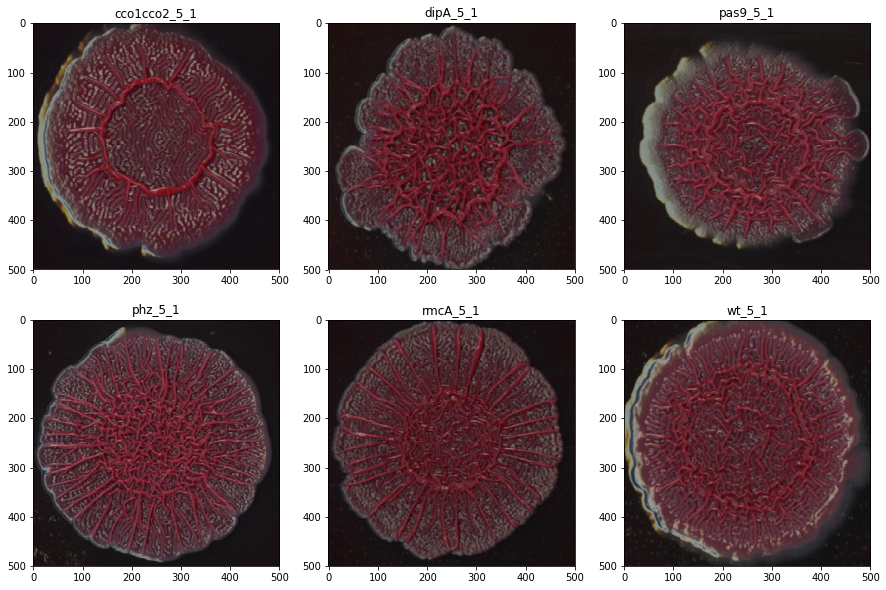

In [3]:
f, axarr = plt.subplots(2, 3, figsize = (15,10))
k = 0
for i in range(2) :
    for j in range(3) :
        axarr[i,j].imshow(images[names[k]])
        axarr[i,j].set_title(names[k])
        k += 1

## Getting the wrinkle class

In [4]:
images_wrinkle_class = {}
for name in names :
    images_wrinkle_class[name] = get_wrinkles(images[name], resize = size, background_is_black = True)[1]

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:77: RuntimeWarning:

divide by zero encountered in true_divide



### Plotting wrinkle class

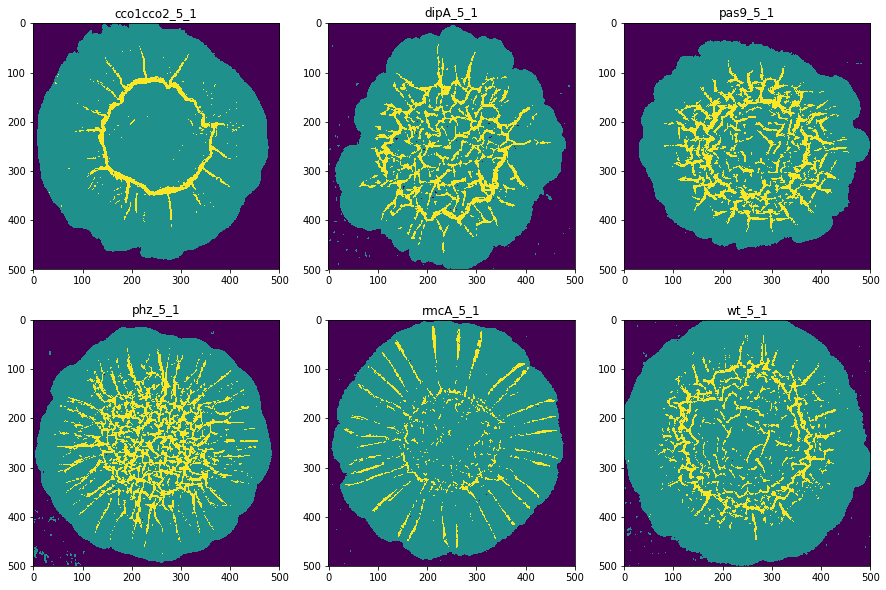

In [5]:
f, axarr = plt.subplots(2, 3, figsize = (15,10))
k = 0
for i in range(2) :
    for j in range(3) :
        axarr[i,j].imshow(images_wrinkle_class[names[k]])
        axarr[i,j].set_title(names[k])
        k += 1

### Computing percent wrinkled

In [6]:
percent_wrinkled = []
for name in names :
    percent_wrinkled.append(perc_wrinkled(images[name], background_is_black = True, resize = size))

dic_features['percent_wrinkled'] = percent_wrinkled

df_features = pd.DataFrame.from_dict(dic_features)
df_features

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:77: RuntimeWarning:

divide by zero encountered in true_divide



,biofilm,percent_wrinkled
0,cco1cco2_5_1,6.29
1,dipA_5_1,18.15
2,pas9_5_1,21.08
3,phz_5_1,22.91
4,rmcA_5_1,7.69
5,wt_5_1,12.23


## Detecting the spokes

In [7]:
images_spokes = {}
for name in names :
    images_spokes[name] = detect_spokes(images[name], resize = size)[0]

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:77: RuntimeWarning:

divide by zero encountered in true_divide

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:121: RuntimeWarning:

divide by zero encountered in int_scalars



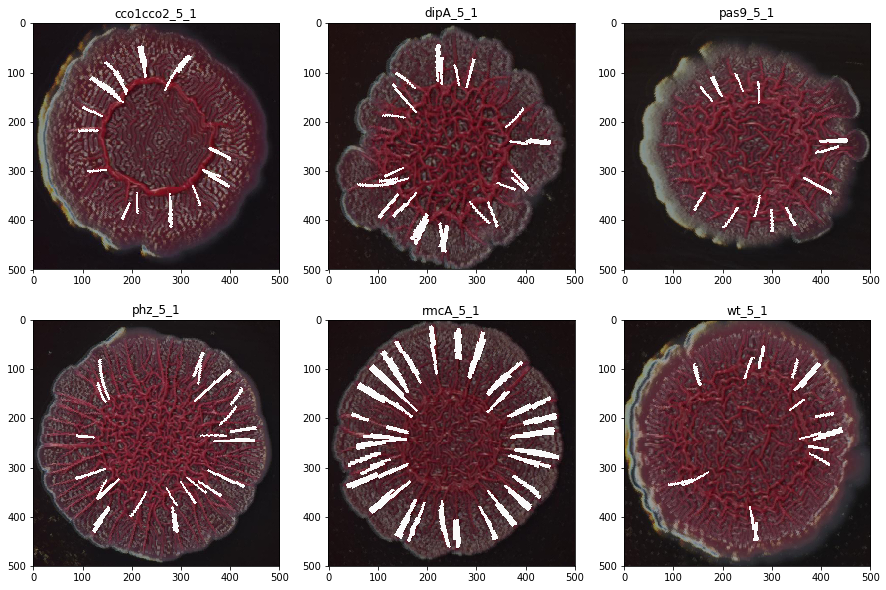

In [8]:
f, axarr = plt.subplots(2, 3, figsize = (15,10))
k = 0
for i in range(2) :
    for j in range(3) :
        axarr[i,j].imshow(images_spokes[names[k]])
        axarr[i,j].set_title(names[k])
        k += 1

### Computing number of spokes, medium length of spokes and medium distance from center

In [9]:
n_spokes = []
medium_spokes_length = []
medium_dist_center = []
for name in names :
    _, n_spoke, medium_length, medium_dist = detect_spokes(images[name], resize = size)
    n_spokes.append(n_spoke)
    medium_spokes_length.append(medium_length)
    medium_dist_center.append(medium_dist)

dic_features['n_spokes'] = n_spokes
dic_features['medium_spokes_length'] = medium_spokes_length
dic_features['medium_dist_center'] = medium_dist_center

df_features = pd.DataFrame.from_dict(dic_features)
df_features

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:77: RuntimeWarning:

divide by zero encountered in true_divide

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:121: RuntimeWarning:

divide by zero encountered in int_scalars



,biofilm,percent_wrinkled,n_spokes,medium_spokes_length,medium_dist_center
0,cco1cco2_5_1,6.29,25,67.067131,160.0
1,dipA_5_1,18.15,31,68.117545,157.0
2,pas9_5_1,21.08,14,59.211139,152.0
3,phz_5_1,22.91,26,73.669880,166.5
4,rmcA_5_1,7.69,94,84.692987,168.0
5,wt_5_1,12.23,19,63.639610,191.0
